In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import math
from HelperFunctions import PDGToColor

In [2]:
#file = uproot.open('files/gaussian/nu_dune10kt_1x2x6_1109_821_20230827T003745Z_gen_g4_detsim_hitreco_IvysaurusTrainingFiles.root')
#IvysaurusTrainingFiles_nue.root
file = uproot.open('files/gaussian/nue_dune10kt_1x2x6_1407_5_20230826T073406Z_gen_g4_detsim_hitreco_IvysaurusTrainingFiles.root')
#file = uproot.open('files/gaussian/nue_inv.root')
#ivysaurus_nu.root
tree = file['ivyTrain/ivysaur']
branches = tree.arrays()

In [31]:
start = 1
nPFParticles = 1

INDEX = 5
DISPLACEMENT_MODE = True

In [32]:
print('PDG: ', branches['TruePDG'][INDEX])
print('Run: ', branches['Run'][INDEX])
print('Subrun: ', branches['Subrun'][INDEX])
print('Event: ', branches['Event'][INDEX])
print('TrackScore: ', branches['TrackScore'][INDEX])
print('Completeness: ', branches['Completeness'][INDEX])
print('Purity: ', branches['Purity'][INDEX])

PDG:  11
Run:  1407
Subrun:  1
Event:  504
TrackScore:  0.30467975
Completeness:  0.78338116
Purity:  0.9875566


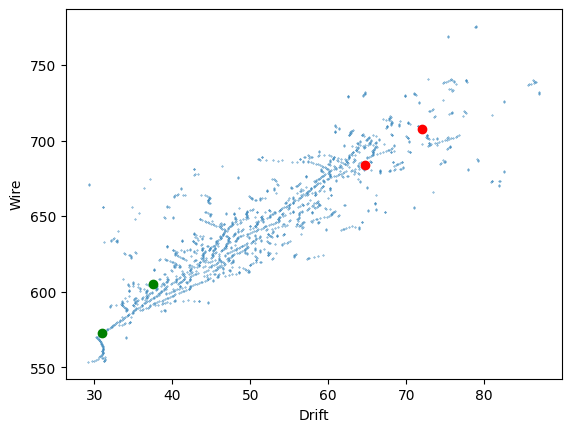

In [33]:
plt.scatter(branches['ProjectionsU'][INDEX][:,0], branches['ProjectionsU'][INDEX][:,2], 0.1)
plt.xlabel("Drift")
plt.ylabel("Wire")
plt.scatter(branches['StartDriftBoundariesU'][INDEX][0], branches['StartWireBoundariesU'][INDEX][0], c='g')
plt.scatter(branches['StartDriftBoundariesU'][INDEX][-1], branches['StartWireBoundariesU'][INDEX][-1], c='g')

plt.scatter(branches['EndDriftBoundariesU'][INDEX][0], branches['EndWireBoundariesU'][INDEX][0], c='r')
plt.scatter(branches['EndDriftBoundariesU'][INDEX][-1], branches['EndWireBoundariesU'][INDEX][-1], c='r')
plt.show()

[31, 31.3, 31.5, 31.8, 32.1, 32.4, 32.6, ..., 36.2, 36.5, 36.7, 37, 37.3, 37.6]
[64.7, 65, 65.3, 65.6, 65.9, 66.2, 66.5, ..., 70.5, 70.8, 71.1, 71.4, 71.7, 72]


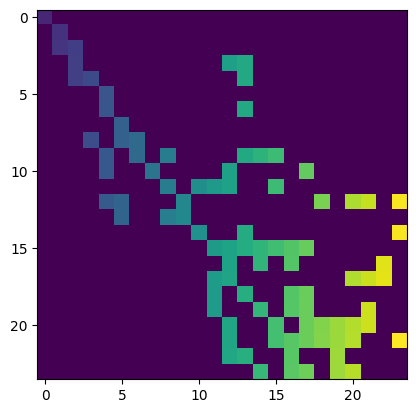

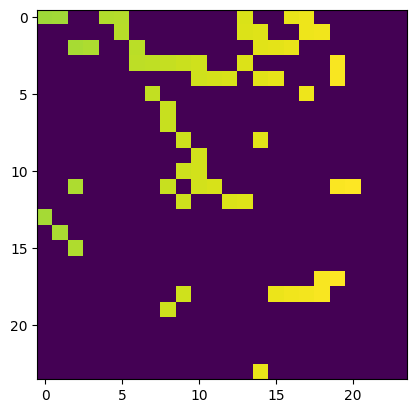

In [34]:
print(branches['StartDriftBoundariesU'][INDEX])
print(branches['EndDriftBoundariesU'][INDEX])

fig_startU, ax_startU = plt.subplots(1,1)

if (DISPLACEMENT_MODE) :
    ax_startU.imshow(branches['StartGridUDisp'][INDEX])
else :
    ax_startU.imshow(branches['StartGridU'][INDEX])


fig_endU, ax_endU = plt.subplots(1,1)

if (DISPLACEMENT_MODE) :
    ax_endU.imshow(branches['EndGridUDisp'][INDEX])
else : 
    ax_endU.imshow(branches['EndGridU'][INDEX])

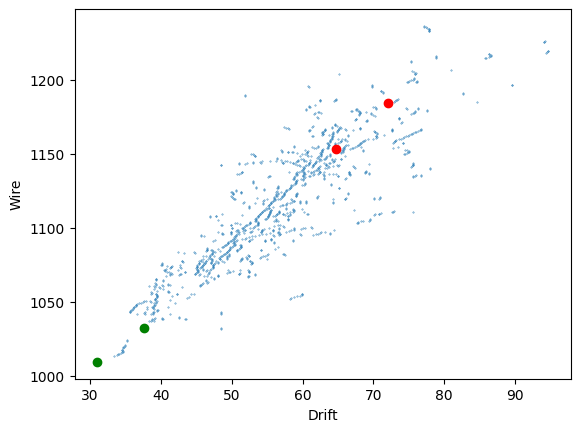

In [37]:
plt.scatter(branches['ProjectionsV'][INDEX][:,0], branches['ProjectionsV'][INDEX][:,2], 0.1)
plt.xlabel("Drift")
plt.ylabel("Wire")
plt.scatter(branches['StartDriftBoundariesV'][INDEX][0], branches['StartWireBoundariesV'][INDEX][0], c='g')
plt.scatter(branches['StartDriftBoundariesV'][INDEX][-1], branches['StartWireBoundariesV'][INDEX][-1], c='g')

plt.scatter(branches['EndDriftBoundariesV'][INDEX][0], branches['EndWireBoundariesV'][INDEX][0], c='r')
plt.scatter(branches['EndDriftBoundariesV'][INDEX][-1], branches['EndWireBoundariesV'][INDEX][-1], c='r')
plt.show()


[31, 31.3, 31.5, 31.8, 32.1, 32.4, 32.6, ..., 36.2, 36.5, 36.7, 37, 37.3, 37.6]
[64.7, 65, 65.3, 65.6, 65.9, 66.2, 66.5, ..., 70.5, 70.8, 71.1, 71.4, 71.7, 72]
[1.01e+03, 1.01e+03, 1.01e+03, 1.01e+03, ..., 1.03e+03, 1.03e+03, 1.03e+03]
[1.15e+03, 1.15e+03, 1.16e+03, 1.16e+03, ..., 1.18e+03, 1.18e+03, 1.18e+03]


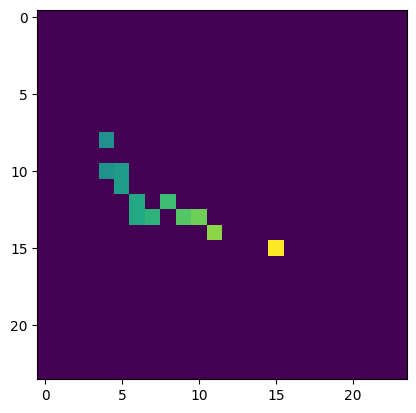

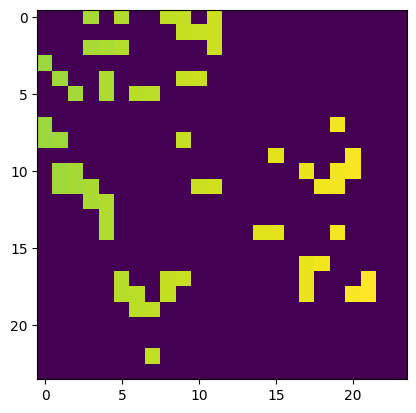

In [39]:
print(branches['StartDriftBoundariesV'][INDEX])
print(branches['EndDriftBoundariesV'][INDEX])

print(branches['StartWireBoundariesV'][INDEX])
print(branches['EndWireBoundariesV'][INDEX])

fig_startV, ax_startV = plt.subplots(1,1)

if (DISPLACEMENT_MODE) :
    ax_startV.imshow(branches['StartGridVDisp'][INDEX])
else :
    ax_startV.imshow(branches['StartGridV'][INDEX])


fig_endV, ax_endV = plt.subplots(1,1)

if (DISPLACEMENT_MODE) :
    ax_endV.imshow(branches['EndGridVDisp'][INDEX])
else : 
    ax_endV.imshow(branches['EndGridV'][INDEX])

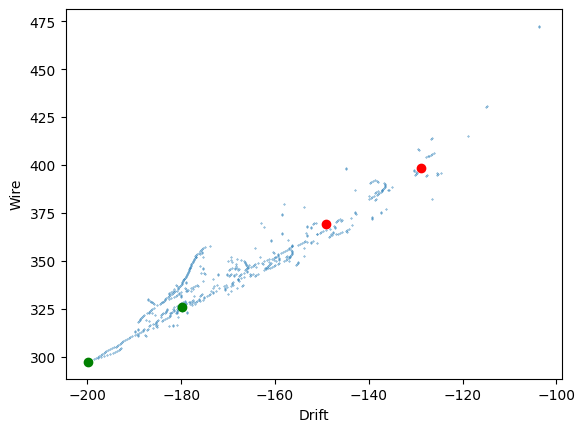

In [13]:
plt.scatter(branches['ProjectionsW'][INDEX][:,0], branches['ProjectionsW'][INDEX][:,2], 0.1)
plt.xlabel("Drift")
plt.ylabel("Wire")
plt.scatter(branches['StartDriftBoundariesW'][INDEX][0], branches['StartWireBoundariesW'][INDEX][0], c='g')
plt.scatter(branches['StartDriftBoundariesW'][INDEX][-1], branches['StartWireBoundariesW'][INDEX][-1], c='g')

plt.scatter(branches['EndDriftBoundariesW'][INDEX][0], branches['EndWireBoundariesW'][INDEX][0], c='r')
plt.scatter(branches['EndDriftBoundariesW'][INDEX][-1], branches['EndWireBoundariesW'][INDEX][-1], c='r')
plt.show()

[-200, -199, -198, -197, -196, -196, ..., -184, -183, -182, -181, -181, -180]
[-149, -148, -147, -147, -146, -145, ..., -133, -132, -131, -130, -130, -129]


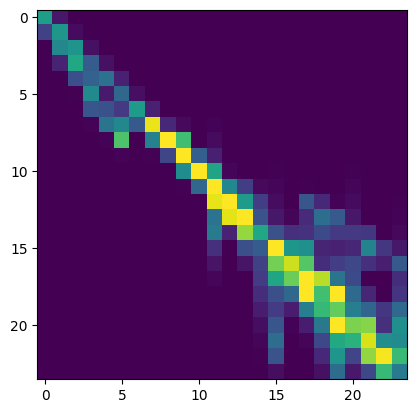

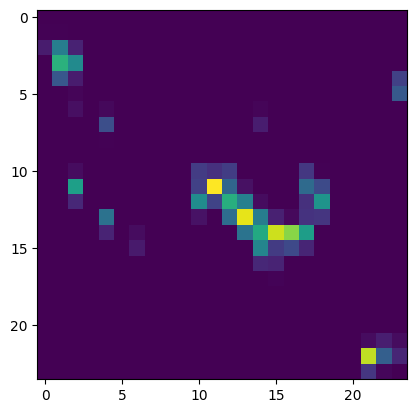

In [14]:
print(branches['StartDriftBoundariesW'][INDEX])
print(branches['EndDriftBoundariesW'][INDEX])

fig_startW, ax_startW = plt.subplots(1,1)
ax_startW.imshow(branches['StartGridW'][INDEX])

fig_endW, ax_endW = plt.subplots(1,1)
ax_endW.imshow(branches['EndGridW'][INDEX])

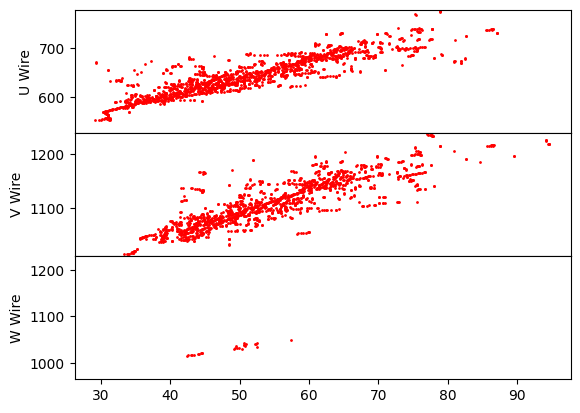

In [229]:
# Might be better just to plot them individually, could choose colour based on particle type
allDriftMin = 1e10
allDriftMax = -1e10
allWireMinU = 1e10
allWireMaxU = -1e10
allWireMinV = 1e10
allWireMaxV = -1e10
allWireMinW = 1e10
allWireMaxW = -1e10

for particleIndex in range(5, 7):
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])
    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])
    
    if len(driftCoordsU) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsU.min())
        allDriftMax = max(allDriftMax, driftCoordsU.max())
        allWireMinU = min(allWireMinU, wireCoordsU.min())
        allWireMaxU = max(allWireMaxU, wireCoordsU.max())
    
    if len(driftCoordsV) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsV.min())
        allDriftMax = max(allDriftMax, driftCoordsV.max())
        allWireMinV = min(allWireMinV, wireCoordsV.min())
        allWireMaxV = max(allWireMaxV, wireCoordsV.max())

    if len(driftCoordsW) != 0 :
        allDriftMin = min(allDriftMin, driftCoordsW.min())
        allDriftMax = max(allDriftMax, driftCoordsW.max())
        allWireMinW = min(allWireMinW, wireCoordsW.min())
        allWireMaxW = max(allWireMaxW, wireCoordsW.max())
    
# Now lets draw plots!
plt.subplots(nrows = 3, ncols = 1, gridspec_kw = {'wspace': 0, 'hspace': 0})  
buffer = 3.0

                 
# ------------------------------
# Draw U
# ------------------------------

plt.subplot(3, 1, 1)

for particleIndex in range(5, 6):
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    plt.scatter(driftCoordsU, wireCoordsU, s=1, c=PDGToColor(particlePDG))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinU - buffer, allWireMaxU + buffer])
plt.ylabel("U Wire")
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3, 1, 2)

# ------------------------------
# Draw V
# ------------------------------

for particleIndex in range(5, 7):
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    plt.scatter(driftCoordsV, wireCoordsV, s=1, c=PDGToColor(particlePDG))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinV- buffer, allWireMaxV + buffer])
plt.ylabel("V Wire")
plt.gca().axes.get_xaxis().set_visible(False)

# ------------------------------
# Draw W
# ------------------------------

plt.subplot(3, 1, 3)

for particleIndex in range(6, 7):
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])
    particlePDG = branches['TruePDG'][particleIndex]
    
    plt.scatter(driftCoordsW, wireCoordsW, s=1, c=PDGToColor(particlePDG))

plt.xlim([allDriftMin - buffer, allDriftMax + buffer])
plt.ylim([allWireMinW - buffer, allWireMaxW + buffer])
plt.ylabel("W Wire")
    
plt.show()


In [108]:
maxGridTransparency = 0.6

for particleIndex in range(start, nPFParticles):
    
    # Get truth information
    particlePDG = branches['TruePDG'][particleIndex]
        
    # First, completeness and nHit
    completeness = branches['Completeness'][particleIndex]
    purity = branches['Purity'][particleIndex]
    nSpacepoints = branches['NSpacePoints'][particleIndex]

    if (completeness < 0.5) | (purity < 0.5) | (nSpacepoints < 50):
        continue
    
    trackLength = branches['TrackLength'][particleIndex]
    
    print('Completeness: ', completeness)
    print('Purity: ', purity)
    print('NSpacePoints: ', nSpacepoints)
    
    # Get coordinates
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])

    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])

    # Get start grid boundaries
    startDriftBoundariesU = np.asarray(branches['StartDriftBoundariesU'][particleIndex])
    startDriftBoundariesV = np.asarray(branches['StartDriftBoundariesV'][particleIndex])
    startDriftBoundariesW = np.asarray(branches['StartDriftBoundariesW'][particleIndex])

    startWireBoundariesU = np.asarray(branches['StartWireBoundariesU'][particleIndex])
    startWireBoundariesV = np.asarray(branches['StartWireBoundariesV'][particleIndex])
    startWireBoundariesW = np.asarray(branches['StartWireBoundariesW'][particleIndex])
    
    # Get end grid boundaries
    endDriftBoundariesU = np.asarray(branches['EndDriftBoundariesU'][particleIndex])
    endDriftBoundariesV = np.asarray(branches['EndDriftBoundariesV'][particleIndex])
    endDriftBoundariesW = np.asarray(branches['EndDriftBoundariesW'][particleIndex])

    endWireBoundariesU = np.asarray(branches['EndWireBoundariesU'][particleIndex])
    endWireBoundariesV = np.asarray(branches['EndWireBoundariesV'][particleIndex])
    endWireBoundariesW = np.asarray(branches['EndWireBoundariesW'][particleIndex])
    
    # Get start grid!
    startGridU = branches['StartGridU'][particleIndex]
    startGridV = branches['StartGridV'][particleIndex]
    startGridW = branches['StartGridW'][particleIndex]
    
    # Get end grid!
    endGridU = branches['EndGridU'][particleIndex]
    endGridV = branches['EndGridV'][particleIndex]
    endGridW = branches['EndGridW'][particleIndex]
    
    if (len(driftCoordsU) == 0 or len(driftCoordsV) == 0 or len(driftCoordsW) == 0):
        continue
    
    # Now lets draw plots!
    plt.subplots(nrows = 3, ncols = 2, gridspec_kw = {'wspace': 10.0, 'hspace': 1})

    globalDriftMin = min(driftCoordsU.min(), driftCoordsV.min(), driftCoordsW.min(), startDriftBoundariesU.min(), endDriftBoundariesU.min())
    globalDriftMax = max(driftCoordsU.max(), driftCoordsV.max(), driftCoordsW.max(), startDriftBoundariesU.max(), endDriftBoundariesU.max())

    driftLimits = [[globalDriftMin - buffer, globalDriftMax + buffer], [startDriftBoundariesU.min() - buffer, startDriftBoundariesU.max() + buffer], [endDriftBoundariesU.min() - buffer, endDriftBoundariesU.max() + buffer]]
    wireLimitsU = [[min(wireCoordsU.min(), startWireBoundariesU.min(), endWireBoundariesU.min()) - buffer, max(wireCoordsU.max(), startWireBoundariesU.max(), endWireBoundariesU.max()) + buffer], [startWireBoundariesU.min() - buffer, startWireBoundariesU.max() + buffer], [endWireBoundariesU.min() - buffer, endWireBoundariesU.max() + buffer]]
    wireLimitsV = [[min(wireCoordsV.min(), startWireBoundariesV.min(), endWireBoundariesV.min()) - buffer, max(wireCoordsV.max(), startWireBoundariesV.max(), endWireBoundariesV.max()) + buffer], [startWireBoundariesV.min() - buffer, startWireBoundariesV.max() + buffer], [endWireBoundariesV.min() - buffer, endWireBoundariesV.max() + buffer]]
    wireLimitsW = [[min(wireCoordsW.min(), startWireBoundariesW.min(), endWireBoundariesW.min()) - buffer, max(wireCoordsW.max(), startWireBoundariesW.max(), endWireBoundariesW.max()) + buffer], [startWireBoundariesW.min() - buffer, startWireBoundariesW.max() + buffer], [endWireBoundariesW.min() - buffer, endWireBoundariesW.max() + buffer]]

    print('PDG: ' + str(particlePDG))
    print('TrackLength: ', str(trackLength))
    
    count = 1;

    # ------------------------------
    # Draw U
    # ------------------------------

    for i in range(3):
        plt.subplot(3, 3, count)
        plt.scatter(driftCoordsU, wireCoordsU, s=1)
    
        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsU[i])
        plt.ylabel("U Wire")
    
        if i == 1 or i == 2: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")
        
        plt.gca().axes.get_xaxis().set_visible(False)

        # Draw start grid
        if i == 0 or i == 1:
            for boundary in startDriftBoundariesU:
                plt.vlines(boundary, startWireBoundariesU.min(), startWireBoundariesU.max(), color='tab:orange')

            for boundary in startWireBoundariesU:
                plt.hlines(boundary, startDriftBoundariesU.min(), startDriftBoundariesU.max(), color='tab:orange')
            
            # Fill start grid, with relative shading
            if i == 1:
                maxWeightU = -1e10

                for driftIndex in range(len(startDriftBoundariesU) - 1):
                    for wireIndex in range(len(startWireBoundariesU) - 1):

                        gridEntry = startGridU[driftIndex][wireIndex]

                        if gridEntry > maxWeightU:
                            maxWeightU = gridEntry

                for driftIndex in range(len(startDriftBoundariesU) - 1):
                    for wireIndex in range(len(startWireBoundariesU) - 1):

                        gridEntry = startGridU[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([startDriftBoundariesU[driftIndex], startDriftBoundariesU[driftIndex + 1], startDriftBoundariesU[driftIndex + 1], startDriftBoundariesU[driftIndex]], [startWireBoundariesU[wireIndex], startWireBoundariesU[wireIndex], startWireBoundariesU[wireIndex + 1], startWireBoundariesU[wireIndex + 1]], "tab:orange", alpha=(gridEntry * maxGridTransparency / maxWeightU))

        # Draw end grid
        if i == 0 or i == 2:
            for boundary in endDriftBoundariesU:
                plt.vlines(boundary, endWireBoundariesU.min(), endWireBoundariesU.max(), color='tab:green')

            for boundary in endWireBoundariesU:
                plt.hlines(boundary, endDriftBoundariesU.min(), endDriftBoundariesU.max(), color='tab:green')
            
            # Fill end grid, with relative shading
            if i == 2:
                maxWeightU = -1e10

                for driftIndex in range(len(endDriftBoundariesU) - 1):
                    for wireIndex in range(len(endWireBoundariesU) - 1):

                        gridEntry = endGridU[driftIndex][wireIndex]

                        if gridEntry > maxWeightU:
                            maxWeightU = gridEntry

                for driftIndex in range(len(endDriftBoundariesU) - 1):
                    for wireIndex in range(len(endWireBoundariesU) - 1):

                        gridEntry = endGridU[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([endDriftBoundariesU[driftIndex], endDriftBoundariesU[driftIndex + 1], endDriftBoundariesU[driftIndex + 1], endDriftBoundariesU[driftIndex]], [endWireBoundariesU[wireIndex], endWireBoundariesU[wireIndex], endWireBoundariesU[wireIndex + 1], endWireBoundariesU[wireIndex + 1]], "tab:green", alpha=(gridEntry * maxGridTransparency / maxWeightU))  
                            
        count += 1

    # ------------------------------
    # Draw V
    # ------------------------------

    for i in range(3):
        plt.subplot(3, 3, count)
        plt.scatter(driftCoordsV, wireCoordsV, s=1)
    
        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsV[i])
        plt.ylabel("V Wire")
    
        if i == 1 or i == 2: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")
        
        plt.gca().axes.get_xaxis().set_visible(False)

        # Draw start grid
        if i == 0 or i == 1:
            for boundary in startDriftBoundariesV:
                plt.vlines(boundary, startWireBoundariesV.min(), startWireBoundariesV.max(), color='tab:orange')

            for boundary in startWireBoundariesV:
                plt.hlines(boundary, startDriftBoundariesV.min(), startDriftBoundariesV.max(), color='tab:orange')
            
            # Fill start grid, with relative shading
            if i == 1:
                maxWeightV = -1e10

                for driftIndex in range(len(startDriftBoundariesV) - 1):
                    for wireIndex in range(len(startWireBoundariesV) - 1):

                        gridEntry = startGridV[driftIndex][wireIndex]

                        if gridEntry > maxWeightV:
                            maxWeightV = gridEntry

                for driftIndex in range(len(startDriftBoundariesV) - 1):
                    for wireIndex in range(len(startWireBoundariesV) - 1):

                        gridEntry = startGridV[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([startDriftBoundariesV[driftIndex], startDriftBoundariesV[driftIndex + 1], startDriftBoundariesV[driftIndex + 1], startDriftBoundariesV[driftIndex]], [startWireBoundariesV[wireIndex], startWireBoundariesV[wireIndex], startWireBoundariesV[wireIndex + 1], startWireBoundariesV[wireIndex + 1]], "tab:orange", alpha=(gridEntry * maxGridTransparency / maxWeightV))

        # Draw end grid
        if i == 0 or i == 2:
            for boundary in endDriftBoundariesV:
                plt.vlines(boundary, endWireBoundariesV.min(), endWireBoundariesV.max(), color='tab:green')

            for boundary in endWireBoundariesV:
                plt.hlines(boundary, endDriftBoundariesV.min(), endDriftBoundariesV.max(), color='tab:green')
            
            # Fill end grid, with relative shading
            if i == 2:
                maxWeightV = -1e10

                for driftIndex in range(len(endDriftBoundariesV) - 1):
                    for wireIndex in range(len(endWireBoundariesV) - 1):

                        gridEntry = endGridV[driftIndex][wireIndex]

                        if gridEntry > maxWeightV:
                            maxWeightV = gridEntry

                for driftIndex in range(len(endDriftBoundariesV) - 1):
                    for wireIndex in range(len(endWireBoundariesV) - 1):

                        gridEntry = endGridV[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([endDriftBoundariesV[driftIndex], endDriftBoundariesV[driftIndex + 1], endDriftBoundariesV[driftIndex + 1], endDriftBoundariesV[driftIndex]], [endWireBoundariesV[wireIndex], endWireBoundariesV[wireIndex], endWireBoundariesV[wireIndex + 1], endWireBoundariesV[wireIndex + 1]], "tab:green", alpha=(gridEntry * maxGridTransparency / maxWeightV))  
                            
        count += 1


    # ------------------------------
    # Draw W
    # ------------------------------


    for i in range(3):
        plt.subplot(3, 3, count)
        plt.scatter(driftCoordsW, wireCoordsW, s=1)
    
        plt.xlim(driftLimits[i])
        plt.ylim(wireLimitsW[i])
        plt.ylabel("W Wire")
        plt.xlabel("Drift Coordinates")
    
        if i == 1 or i == 2: 
            plt.gca().axes.get_yaxis().tick_right() 
            plt.gca().axes.get_yaxis().set_label_position("right")

        # Draw start grid
        if i == 0 or i == 1:
            for boundary in startDriftBoundariesW:
                plt.vlines(boundary, startWireBoundariesW.min(), startWireBoundariesW.max(), color='tab:orange')

            for boundary in startWireBoundariesW:
                plt.hlines(boundary, startDriftBoundariesW.min(), startDriftBoundariesW.max(), color='tab:orange')
            
            # Fill start grid, with relative shading
            if i == 1:
                maxWeightW = -1e10

                for driftIndex in range(len(startDriftBoundariesW) - 1):
                    for wireIndex in range(len(startWireBoundariesW) - 1):

                        gridEntry = startGridW[driftIndex][wireIndex]

                        if gridEntry > maxWeightW:
                            maxWeightW = gridEntry

                for driftIndex in range(len(startDriftBoundariesW) - 1):
                    for wireIndex in range(len(startWireBoundariesW) - 1):

                        gridEntry = startGridW[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([startDriftBoundariesW[driftIndex], startDriftBoundariesW[driftIndex + 1], startDriftBoundariesW[driftIndex + 1], startDriftBoundariesW[driftIndex]], [startWireBoundariesW[wireIndex], startWireBoundariesW[wireIndex], startWireBoundariesW[wireIndex + 1], startWireBoundariesW[wireIndex + 1]], "tab:orange", alpha=(gridEntry * maxGridTransparency / maxWeightW))

        # Draw end grid
        if i == 0 or i == 2:
            for boundary in endDriftBoundariesW:
                plt.vlines(boundary, endWireBoundariesW.min(), endWireBoundariesW.max(), color='tab:green')

            for boundary in endWireBoundariesW:
                plt.hlines(boundary, endDriftBoundariesW.min(), endDriftBoundariesW.max(), color='tab:green')
            
            # Fill end grid, with relative shading
            if i == 2:
                maxWeightW = -1e10

                for driftIndex in range(len(endDriftBoundariesW) - 1):
                    for wireIndex in range(len(endWireBoundariesW) - 1):

                        gridEntry = endGridW[driftIndex][wireIndex]

                        if gridEntry > maxWeightW:
                            maxWeightW = gridEntry

                for driftIndex in range(len(endDriftBoundariesW) - 1):
                    for wireIndex in range(len(endWireBoundariesW) - 1):

                        gridEntry = endGridW[driftIndex][wireIndex]

                        if gridEntry > 1e-10 :
                            plt.fill([endDriftBoundariesW[driftIndex], endDriftBoundariesW[driftIndex + 1], endDriftBoundariesW[driftIndex + 1], endDriftBoundariesW[driftIndex]], [endWireBoundariesW[wireIndex], endWireBoundariesW[wireIndex], endWireBoundariesW[wireIndex + 1], endWireBoundariesW[wireIndex + 1]], "tab:green", alpha=(gridEntry * maxGridTransparency / maxWeightW))  
                            
        count += 1
     
    plt.show()

In [109]:
for particleIndex in range(start, nPFParticles):
    
    # Get truth information
    particlePDG = branches['TruePDG'][particleIndex]
        
    # First, completeness and nHit
    completeness = branches['Completeness'][particleIndex]
    purity = branches['Purity'][particleIndex]
    nSpacepoints = branches['NSpacePoints'][particleIndex]

    if (completeness < 0.5) | (purity < 0.5) | (nSpacepoints < 50):
        continue
    
    print('particlePDG: ', particlePDG)
    print('Completeness: ', completeness)
    print('Purity: ', purity)
    print('NSpacePoints: ', nSpacepoints)
    
    # Get coordinates
    driftCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,0])
    driftCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,0])
    driftCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,0])

    wireCoordsU = np.asarray(branches['ProjectionsU'][particleIndex,:,2])
    wireCoordsV = np.asarray(branches['ProjectionsV'][particleIndex,:,2])
    wireCoordsW = np.asarray(branches['ProjectionsW'][particleIndex,:,2])

    # Get start grid boundaries
    startDriftBoundariesU = np.asarray(branches['StartDriftBoundariesU'][particleIndex])
    startDriftBoundariesV = np.asarray(branches['StartDriftBoundariesV'][particleIndex])
    startDriftBoundariesW = np.asarray(branches['StartDriftBoundariesW'][particleIndex])

    startWireBoundariesU = np.asarray(branches['StartWireBoundariesU'][particleIndex])
    startWireBoundariesV = np.asarray(branches['StartWireBoundariesV'][particleIndex])
    startWireBoundariesW = np.asarray(branches['StartWireBoundariesW'][particleIndex])
    
    # Get end grid boundaries
    endDriftBoundariesU = np.asarray(branches['EndDriftBoundariesU'][particleIndex])
    endDriftBoundariesV = np.asarray(branches['EndDriftBoundariesV'][particleIndex])
    endDriftBoundariesW = np.asarray(branches['EndDriftBoundariesW'][particleIndex])

    endWireBoundariesU = np.asarray(branches['EndWireBoundariesU'][particleIndex])
    endWireBoundariesV = np.asarray(branches['EndWireBoundariesV'][particleIndex])
    endWireBoundariesW = np.asarray(branches['EndWireBoundariesW'][particleIndex])
    
    # REDFINE THE GRID...
    startDriftSpanU = math.fabs(startDriftBoundariesU[0] - startDriftBoundariesU[-1])
    startDriftSpanV = math.fabs(startDriftBoundariesV[0] - startDriftBoundariesV[-1])    
    startDriftSpanW = math.fabs(startDriftBoundariesW[0] - startDriftBoundariesW[-1])
    
    endDriftSpanU = math.fabs(endDriftBoundariesU[0] - endDriftBoundariesU[-1])
    endDriftSpanV = math.fabs(endDriftBoundariesV[0] - endDriftBoundariesV[-1])
    endDriftSpanW = math.fabs(endDriftBoundariesW[0] - endDriftBoundariesW[-1])
    
    startWireSpanU = math.fabs(startWireBoundariesU[0] - startWireBoundariesU[-1])    
    startWireSpanV = math.fabs(startWireBoundariesV[0] - startWireBoundariesV[-1])   
    startWireSpanW = math.fabs(startWireBoundariesW[0] - startWireBoundariesW[-1])  
    
    endWireSpanU = math.fabs(endWireBoundariesU[0] - endWireBoundariesU[-1])
    endWireSpanV = math.fabs(endWireBoundariesV[0] - endWireBoundariesV[-1])    
    endWireSpanW = math.fabs(endWireBoundariesW[0] - endWireBoundariesW[-1])
    
    nBins = 24
    
    startDriftIntervalU = startDriftSpanU / float(nBins)
    startDriftIntervalV = startDriftSpanV / float(nBins)
    startDriftIntervalW = startDriftSpanW / float(nBins)
    
    endDriftIntervalU = endDriftSpanU / float(nBins)
    endDriftIntervalV = endDriftSpanV / float(nBins)
    endDriftIntervalW = endDriftSpanW / float(nBins)
    
    startWireIntervalU = startWireSpanU / float(nBins)
    startWireIntervalV = startWireSpanV / float(nBins)
    startWireIntervalW = startWireSpanW / float(nBins)
    
    endWireIntervalU = endWireSpanU / float(nBins)    
    endWireIntervalV = endWireSpanV / float(nBins)   
    endWireIntervalW = endWireSpanW / float(nBins)   
    
    newStartDriftBoundariesU = []
    newStartDriftBoundariesV = []
    newStartDriftBoundariesW = []
    
    newEndDriftBoundariesU = []    
    newEndDriftBoundariesV = [] 
    newEndDriftBoundariesW = [] 
    
    newStartWireBoundariesU = []
    newStartWireBoundariesV = []
    newStartWireBoundariesW = []
    
    newEndWireBoundariesU = []    
    newEndWireBoundariesV = []    
    newEndWireBoundariesW = []    
    
    for i in range(nBins + 1) :
        newStartDriftBoundariesU.append((startDriftBoundariesU[0] + (float(i) * startDriftIntervalU)))
        newStartDriftBoundariesV.append((startDriftBoundariesV[0] + (float(i) * startDriftIntervalV)))
        newStartDriftBoundariesW.append((startDriftBoundariesW[0] + (float(i) * startDriftIntervalW)))
        
        newEndDriftBoundariesU.append((endDriftBoundariesU[0] + (float(i) * endDriftIntervalU)))
        newEndDriftBoundariesV.append((endDriftBoundariesV[0] + (float(i) * endDriftIntervalV)))
        newEndDriftBoundariesW.append((endDriftBoundariesW[0] + (float(i) * endDriftIntervalW)))
        
        newStartWireBoundariesU.append((startWireBoundariesU[0] + (float(i) * startWireIntervalU)))
        newStartWireBoundariesV.append((startWireBoundariesV[0] + (float(i) * startWireIntervalV)))
        newStartWireBoundariesW.append((startWireBoundariesW[0] + (float(i) * startWireIntervalW)))
        
        newEndWireBoundariesU.append((endWireBoundariesU[0] + (float(i) * endWireIntervalU)))
        newEndWireBoundariesV.append((endWireBoundariesV[0] + (float(i) * endWireIntervalV)))
        newEndWireBoundariesW.append((endWireBoundariesW[0] + (float(i) * endWireIntervalW)))
        

    newStartGridU = np.zeros((nBins, nBins), dtype=float)
    newStartGridV = np.zeros((nBins, nBins), dtype=float)
    newStartGridW = np.zeros((nBins, nBins), dtype=float)
    
    newEndGridU = np.zeros((nBins, nBins), dtype=float)
    newEndGridV = np.zeros((nBins, nBins), dtype=float)
    newEndGridW = np.zeros((nBins, nBins), dtype=float)
    
    
    startMinDriftU = min(startDriftBoundariesU[0], startDriftBoundariesU[-1])
    startMaxDriftU = max(startDriftBoundariesU[0], startDriftBoundariesU[-1])   
    startMinWireU = min(startWireBoundariesU[0], startWireBoundariesU[-1])
    startMaxWireU = max(startWireBoundariesU[0], startWireBoundariesU[-1])
        
    endMinDriftU = min(endDriftBoundariesU[0], endDriftBoundariesU[-1])
    endMaxDriftU = max(endDriftBoundariesU[0], endDriftBoundariesU[-1])  
    endMinWireU = min(endWireBoundariesU[0], endWireBoundariesU[-1])
    endMaxWireU = max(endWireBoundariesU[0], endWireBoundariesU[-1])    
    
    startMinDriftV = min(startDriftBoundariesV[0], startDriftBoundariesV[-1])
    startMaxDriftV = max(startDriftBoundariesV[0], startDriftBoundariesV[-1])   
    startMinWireV = min(startWireBoundariesV[0], startWireBoundariesV[-1])
    startMaxWireV = max(startWireBoundariesV[0], startWireBoundariesV[-1])
        
    endMinDriftV = min(endDriftBoundariesV[0], endDriftBoundariesV[-1])
    endMaxDriftV = max(endDriftBoundariesV[0], endDriftBoundariesV[-1])  
    endMinWireV = min(endWireBoundariesV[0], endWireBoundariesV[-1])
    endMaxWireV = max(endWireBoundariesV[0], endWireBoundariesV[-1])
    
    startMinDriftW = min(startDriftBoundariesW[0], startDriftBoundariesW[-1])
    startMaxDriftW = max(startDriftBoundariesW[0], startDriftBoundariesW[-1])   
    startMinWireW = min(startWireBoundariesW[0], startWireBoundariesW[-1])
    startMaxWireW = max(startWireBoundariesW[0], startWireBoundariesW[-1])
        
    endMinDriftW = min(endDriftBoundariesW[0], endDriftBoundariesW[-1])
    endMaxDriftW = max(endDriftBoundariesW[0], endDriftBoundariesW[-1])  
    endMinWireW = min(endWireBoundariesW[0], endWireBoundariesW[-1])
    endMaxWireW = max(endWireBoundariesW[0], endWireBoundariesW[-1])
    
    
    # U VIEW?
    for i in range(driftCoordsU.shape[0]) :   
        if ((driftCoordsU[i] > startMinDriftU) & (driftCoordsU[i] < startMaxDriftU) & (wireCoordsU[i] > startMinWireU) & (wireCoordsU[i] < startMaxWireU)) :
            driftBin = math.floor(math.fabs(driftCoordsU[i] - startDriftBoundariesU[0]) / startDriftIntervalU)
            wireBin = math.floor(math.fabs(wireCoordsU[i] - startWireBoundariesU[0]) / startWireIntervalU)
            newStartGridU[driftBin][wireBin] += 1
        
        if ((driftCoordsU[i] > endMinDriftU) & (driftCoordsU[i] < endMaxDriftU) & (wireCoordsU[i] > endMinWireU) & (wireCoordsU[i] < endMaxWireU)) :
            driftBin = math.floor(math.fabs(driftCoordsU[i] - endDriftBoundariesU[0]) / endDriftIntervalU) 
            wireBin = math.floor(math.fabs(wireCoordsU[i] - endWireBoundariesU[0]) / endWireIntervalU)
            newEndGridU[driftBin][wireBin] += 1
            
    # V VIEW?
    for i in range(driftCoordsV.shape[0]) :   
        if ((driftCoordsV[i] > startMinDriftV) & (driftCoordsV[i] < startMaxDriftV) & (wireCoordsV[i] > startMinWireV) & (wireCoordsV[i] < startMaxWireV)) :
            driftBin = math.floor(math.fabs(driftCoordsV[i] - startDriftBoundariesV[0]) / startDriftIntervalV)
            wireBin = math.floor(math.fabs(wireCoordsV[i] - startWireBoundariesV[0]) / startWireIntervalV)
            newStartGridV[driftBin][wireBin] += 1
        
        if ((driftCoordsV[i] > endMinDriftV) & (driftCoordsV[i] < endMaxDriftV) & (wireCoordsV[i] > endMinWireV) & (wireCoordsV[i] < endMaxWireV)) :
            driftBin = math.floor(math.fabs(driftCoordsV[i] - endDriftBoundariesV[0]) / endDriftIntervalV) 
            wireBin = math.floor(math.fabs(wireCoordsV[i] - endWireBoundariesV[0]) / endWireIntervalV)
            newEndGridV[driftBin][wireBin] += 1
            
    # U VIEW?
    for i in range(driftCoordsW.shape[0]) :   
        if ((driftCoordsW[i] > startMinDriftW) & (driftCoordsW[i] < startMaxDriftW) & (wireCoordsW[i] > startMinWireW) & (wireCoordsW[i] < startMaxWireW)) :
            driftBin = math.floor(math.fabs(driftCoordsW[i] - startDriftBoundariesW[0]) / startDriftIntervalW)
            wireBin = math.floor(math.fabs(wireCoordsW[i] - startWireBoundariesW[0]) / startWireIntervalW)
            newStartGridW[driftBin][wireBin] += 1
        
        if ((driftCoordsW[i] > endMinDriftW) & (driftCoordsW[i] < endMaxDriftW) & (wireCoordsW[i] > endMinWireW) & (wireCoordsW[i] < endMaxWireW)) :
            driftBin = math.floor(math.fabs(driftCoordsW[i] - endDriftBoundariesW[0]) / endDriftIntervalW) 
            wireBin = math.floor(math.fabs(wireCoordsW[i] - endWireBoundariesW[0]) / endWireIntervalW)
            newEndGridW[driftBin][wireBin] += 1

            
    fig_startU, ax_startU = plt.subplots(1,1)
    ax_startU.imshow(newStartGridU)

    fig_startV, ax_startV = plt.subplots(1,1)
    ax_startV.imshow(newStartGridV)

    fig_startW, ax_startW = plt.subplots(1,1)
    ax_startW.imshow(newStartGridW)
    
    fig_endU, ax_endU = plt.subplots(1,1)
    ax_endU.imshow(newEndGridU)

    fig_enV, ax_endV = plt.subplots(1,1)
    ax_endV.imshow(newEndGridV)

    fig_endW, ax_endW = plt.subplots(1,1)
    ax_endW.imshow(newEndGridW)
    